In [10]:
# %%
# Python standard library
import math
import random

# custom utils
from utils import display_maze
from examples.dense_maze_4x3 import maze

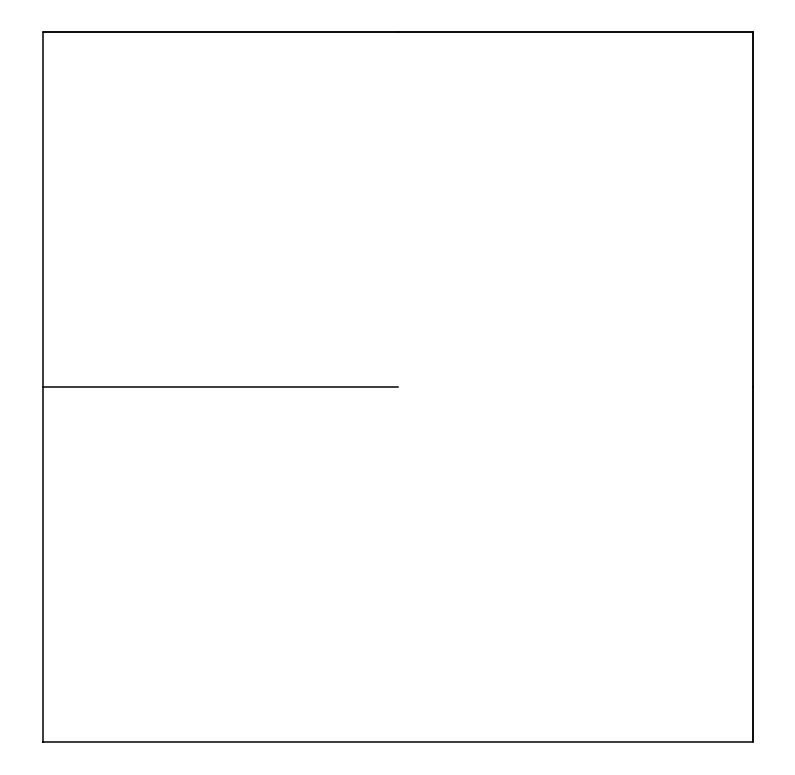

In [17]:
# Votre code ici !


vertices = set([ (0, 0), (1, 0), (0, 1), (1, 1) ])

edges = set([ ( (0,0), (1, 0) ),
( (1, 0), (0, 0) ),
((1, 0), (1, 1)),
((1, 1), (1, 0)),
((1, 1), (0, 1)),
((0, 1), (1, 1)) ])

weights = {((0, 0), (1, 0)): 1, ((1, ), (0, 0)): 1}
display_maze((vertices, edges, weights))




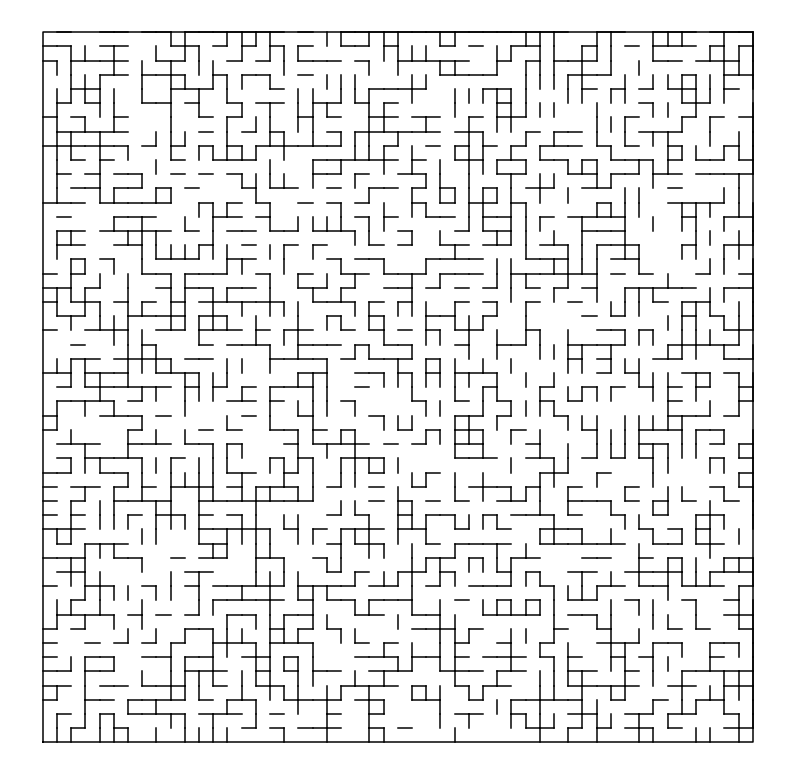

In [65]:
from itertools import product

def full_maze(width, height):
    vertices = set(product(range(width), range(height)))
    edges = set()
    weights = {}
    return vertices, edges, weights
    

#display_maze(full_maze(20, 25))

def empty_maze(width, height):
    vertices = set(product(range(width), range(height)))
    edges = set()
    for w, h in vertices:
        edges.add(((w, h), (w+1, h)))
        edges.add(((w, h), (w, h+1)))
        edges.add(((w, h), (w-1, h)))
        edges.add(((w, h), (w, h-1)))
    weights = {}
    for edge in edges:
        weights[edge] = 1
    return vertices, edges, weights


#display_maze(empty_maze(4, 5))

def random_maze(width, height):
    vertices = set(product(range(width), range(height)))
    edges = set()
    for w, h in vertices:
        if random.randint(0, 2) == 1:
            edges.add(((w, h), (w+1, h)))
            edges.add(((w+1, h), (w, h)))
        if random.randint(0, 2) == 1:
            edges.add(((w, h), (w, h+1)))
            edges.add(((w, h+1), (w, h)))
        if random.randint(0, 2) == 1:
            edges.add(((w, h), (w-1, h)))
            edges.add(((w-1, h), (w, h)))
        if random.randint(0, 2) == 1:
            edges.add(((w, h), (w, h-1)))
            edges.add(((w, h-1), (w, h)))
    weights = {}
    for edge in edges: 
        weights[edge] = 1
    return vertices, edges, weights

display_maze(random_maze(50, 50))

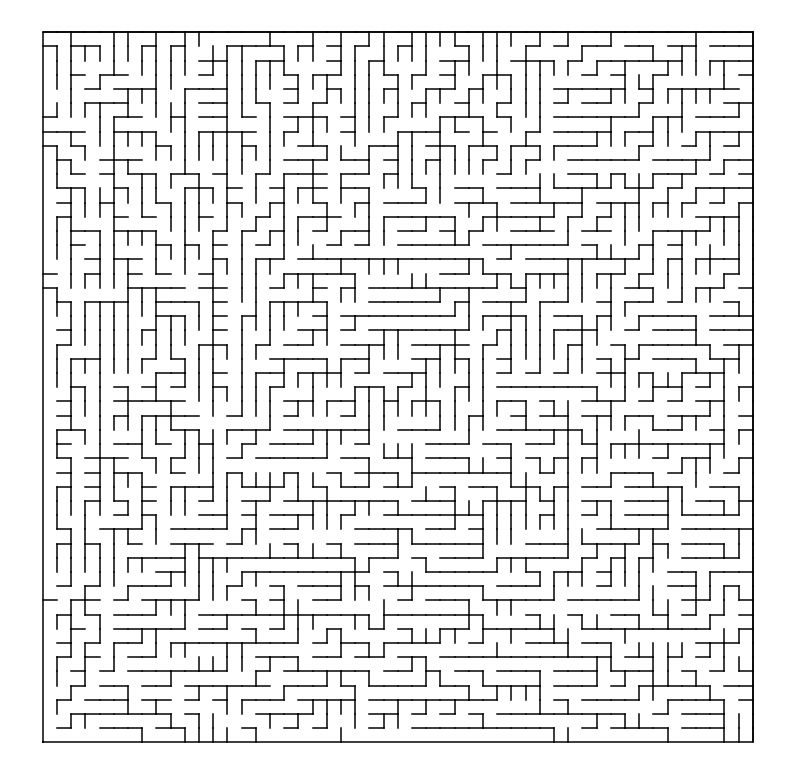

In [96]:
from random import choice

def crea_maze(width, height, starting_point = (0, 0)):
    vertices = set(product(range(width), range(height)))
    edges = set()
    
    dirs = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    to_visit = {starting_point}
    visited = set()
    while len(to_visit)>0:
        current = choice(list(to_visit))
        vecinos = {(current[0] + dir[0], current[1] + dir[1]) for dir in dirs}.intersection(vertices)
        candidates = vecinos - visited - to_visit

        if len(candidates) > 0:
            new = choice(list(candidates))
            edges.add((current ,new))
            edges.add((new, current))
            to_visit.add(new)


        if len(candidates) <= 1:
            visited.add(current)
            to_visit.remove(current)
        

        

        

    weights = {edge : 1 for edge in edges}
    return vertices, edges, weights


display_maze(crea_maze(50, 50))

   

def reachable_set(maze, origin):
    reachable = set()
